
## Regression Analysis with Categories

This notebook demonstrates a regression analysis on a large dataset with categories. 
We will go through the steps of loading data, preprocessing, model training, evaluation, 
and hyperparameter tuning. 

### Steps:
1. Load the dataset.
2. Preprocess the data.
3. Train the model.
4. Evaluate the model.
5. Fine-tune the model.



### Load the Dataset
In this section, we load the dataset and display its structure.


### General information
The dataset used was downloaded from [Kaggle](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease).  For more information about the data (e.g Licensing), please visit the website. 

The subset that was used was: *heart_2022_no_nans.csv*, which was already pre-processed. For this reason, this notebook won't have a heavy cleaning process but rather a feature selection for the parameters that we will use. 

##### Import necessary libraries and dependencies


### Preprocess the Data
Here we preprocess the data by handling missing values, encoding categorical variables, 
and splitting the dataset into training and testing sets.


In [87]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, confusion_matrix, classification_report, accuracy_score,precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None) #to print all the columns when doing things like .head()


##### Data exploration

In [88]:
df=pd.read_csv("data/heart-categories.csv")
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,Former smoker,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 65 to 69,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,No,No,No,No,No,No,No,Yes,Yes,No,No,No,No,No,No,Former smoker,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 70 to 74,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,No,No,No,No,No,No,No,Yes,No,No,Yes,No,Yes,No,No,Former smoker,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 75 to 79,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,No,No,No,Yes,No,Yes,No,Yes,No,No,No,No,Yes,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


##### Selection of features
Please be aware that this model doesn't aim to create a perfect model, but is rather a toy model with which to practice learning algorithms like logistic regression. That's why the features chosen may or may not be right, so please use with care. 


### Train the Model
In this section, we train a machine learning model using the preprocessed data.


In [89]:
columns_to_drop=["State","LastCheckupTime","RemovedTeeth","HadSkinCancer","DeafOrHardOfHearing","BlindOrVisionDifficulty","DifficultyConcentrating","DifficultyWalking","DifficultyDressingBathing","DifficultyErrands","RaceEthnicityCategory","HIVTesting","FluVaxLast12","PneumoVaxEver","ChestScan","TetanusLast10Tdap","CovidPos","HeightInMeters","WeightInKilograms","ECigaretteUsage"]
df.drop(columns=columns_to_drop,inplace=True)
df.head() #showing selected features that will be used. 


,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,SmokerStatus,AgeCategory,BMI,AlcoholDrinkers,HighRiskLastYear
0,Female,Very good,4.0,0.0,Yes,9.0,No,No,No,No,No,No,No,Yes,No,Former smoker,Age 65 to 69,27.99,No,No
1,Male,Very good,0.0,0.0,Yes,6.0,No,No,No,No,No,No,No,Yes,Yes,Former smoker,Age 70 to 74,30.13,No,No
2,Male,Very good,0.0,0.0,No,8.0,No,No,No,No,No,No,No,Yes,No,Former smoker,Age 75 to 79,31.66,Yes,No
3,Female,Fair,5.0,0.0,Yes,9.0,No,No,No,No,No,Yes,No,Yes,No,Never smoked,Age 80 or older,31.32,No,No
4,Female,Good,3.0,15.0,Yes,5.0,No,No,No,No,No,No,No,Yes,No,Never smoked,Age 80 or older,33.07,No,No


##### One hot encoding

We will start by seeing what all the unique values are in each column so we can decide how we will encode the different variables.


### Evaluate the Model
We evaluate the performance of the model using various metrics such as accuracy, 
precision, recall, and F1-score.


In [90]:
unique_values = {col: df[col].unique() for col in df.columns}
print(unique_values)

{'Sex': array(['Female', 'Male'], dtype=object), 'GeneralHealth': array(['Very good', 'Fair', 'Good', 'Excellent', 'Poor'], dtype=object), 'PhysicalHealthDays': array([ 4.,  0.,  5.,  3.,  2., 25., 30., 15., 29.,  8., 16., 20., 10.,
        9.,  7.,  1., 21.,  6., 27., 14., 12., 11., 13., 28., 17., 23.,
       24., 26., 18., 22., 19.]), 'MentalHealthDays': array([ 0., 15.,  4., 25.,  5., 30., 27.,  3.,  2.,  1., 10., 20., 21.,
        6.,  7.,  8., 14.,  9., 12., 18., 29., 28., 17., 11., 16., 13.,
       26., 22., 24., 19., 23.]), 'PhysicalActivities': array(['Yes', 'No'], dtype=object), 'SleepHours': array([ 9.,  6.,  8.,  5.,  7., 10.,  4., 12.,  3., 18., 11.,  2.,  1.,
       16., 14., 15., 13., 20., 24., 23., 19., 17., 22.]), 'HadHeartAttack': array(['No', 'Yes'], dtype=object), 'HadAngina': array(['No', 'Yes'], dtype=object), 'HadStroke': array(['No', 'Yes'], dtype=object), 'HadAsthma': array(['No', 'Yes'], dtype=object), 'HadCOPD': array(['No', 'Yes'], dtype=object), 'HadDepressi

Mapping and encoding of variables

In [91]:
df['Sex'] = df['Sex'].map({'Female': 0, 'Male': 1})
df["HadDiabetes"]=df["HadDiabetes"].map({"No":0,"No, pre-diabetes or borderline diabetes":1,"Yes, but only during pregnancy (female)":2,"Yes":3})


columns_to_map_yes_no = ['PhysicalActivities',"HadAngina","HadStroke","HadHeartAttack","HadAsthma","HadCOPD","HadDepressiveDisorder","HadKidneyDisease","HadArthritis","AlcoholDrinkers","HighRiskLastYear"]
# Apply the replace function to specific columns in the DataFrame
df[columns_to_map_yes_no] = df[columns_to_map_yes_no].replace({'Yes': 1, 'No': 0})


health_map = {
    'Very good': 4,
    'Excellent': 3,
    'Good': 2,
    'Fair': 1,
    'Poor': 0
}
smoker_map={
    "Never smoked":0,
    "Former smoker":1,
    "Current smoker - now smokes some days":3,
    "Current smoker - now smokes every day":4
}
age_map = {
    'Age 18 to 24': 0,
    'Age 25 to 29': 1,
    'Age 30 to 34': 2,
    'Age 35 to 39': 3,
    'Age 40 to 44': 4,
    'Age 45 to 49': 5,
    'Age 50 to 54': 6,
    'Age 55 to 59': 7,
    'Age 60 to 64': 8,
    'Age 65 to 69': 9,
    'Age 70 to 74': 10,
    'Age 75 to 79': 11,
    'Age 80 or older': 12
}

# Apply the mapping using map function
df['AgeCategory'] = df['AgeCategory'].map(age_map)
df["GeneralHealth"]=df["GeneralHealth"].map(health_map)
df["SmokerStatus"]=df["SmokerStatus"].map(smoker_map)

# Print the result
df.head()

C:\Users\14smi\AppData\Local\Temp\ipykernel_4800\2914941063.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columns_to_map_yes_no] = df[columns_to_map_yes_no].replace({'Yes': 1, 'No': 0})


,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,SmokerStatus,AgeCategory,BMI,AlcoholDrinkers,HighRiskLastYear
0,0,4,4.0,0.0,1,9.0,0,0,0,0,0,0,0,1,0,1,9,27.99,0,0
1,1,4,0.0,0.0,1,6.0,0,0,0,0,0,0,0,1,3,1,10,30.13,0,0
2,1,4,0.0,0.0,0,8.0,0,0,0,0,0,0,0,1,0,1,11,31.66,1,0
3,0,1,5.0,0.0,1,9.0,0,0,0,0,0,1,0,1,0,0,12,31.32,0,0
4,0,2,3.0,15.0,1,5.0,0,0,0,0,0,0,0,1,0,0,12,33.07,0,0



### Fine-tune the Model
We perform hyperparameter tuning to improve the model's performance.


Check if we made an error or some variables were encoded wrong. 

Final display of variables that will be used, already encoded.

In [96]:
any_nan = df.isna().any().any()
if any_nan==False: 
    print("Everything looks good!")
else:
    print("There might be a mistake. Please re-check the data")

df.head()

Everything looks good!


,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,SmokerStatus,AgeCategory,BMI,AlcoholDrinkers,HighRiskLastYear
0,0,4,4.0,0.0,1,9.0,0,0,0,0,0,0,0,1,0,1,9,27.99,0,0
1,1,4,0.0,0.0,1,6.0,0,0,0,0,0,0,0,1,3,1,10,30.13,0,0
2,1,4,0.0,0.0,0,8.0,0,0,0,0,0,0,0,1,0,1,11,31.66,1,0
3,0,1,5.0,0.0,1,9.0,0,0,0,0,0,1,0,1,0,0,12,31.32,0,0
4,0,2,3.0,15.0,1,5.0,0,0,0,0,0,0,0,1,0,0,12,33.07,0,0


Check if data is skewed:

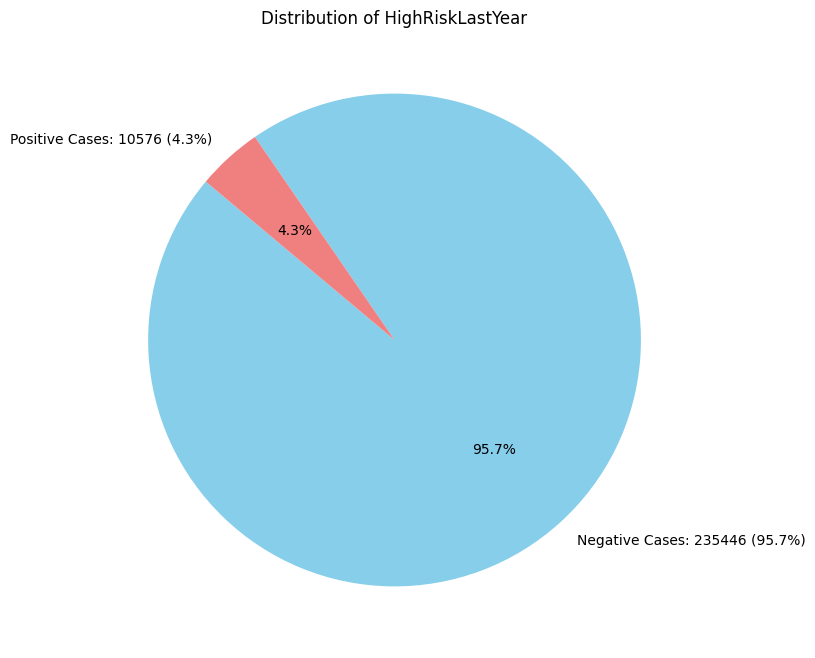

In [107]:
value_counts = df['HighRiskLastYear'].value_counts()

# Convert value_counts to a DataFrame for easier manipulation
value_counts_df = value_counts.reset_index()
value_counts_df.columns = ['HighRiskLastYear', 'Count']

# Map the values to labels
value_counts_df['Label'] = value_counts_df['HighRiskLastYear'].map({1: 'Positive Cases', 0: 'Negative Cases'})

# Calculate the percentages
total = value_counts_df['Count'].sum()
value_counts_df['Percentage'] = (value_counts_df['Count'] / total) * 100

# Create a pie chart
plt.figure(figsize=(8, 8))
colors = ['skyblue', 'lightcoral']
labels = [f'{row.Label}: {row.Count} ({row.Percentage:.1f}%)' for row in value_counts_df.itertuples()]

plt.pie(value_counts_df['Count'], labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Add title
plt.title('Distribution of HighRiskLastYear')

# Show the plot
plt.show()


As we can see, the data is very skewed. It's typical for these types of classification problems (like rare diseases, frauds, etc...) to have a skewed dataset. 

We will try to train the model with this skewed dataset and see what happens. 

##### Scaling and splitting training and testing sets

In [57]:
#Input variables and targets
scaler=StandardScaler()
X=df.drop(columns=["HighRiskLastYear"])
X_scaled=scaler.fit_transform(X)
y=df["HighRiskLastYear"]
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



In [58]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [59]:
y_pred_proba=model.predict_proba(X_test) #we will get two columns. The first is the probability of not having the risk of a heart disease, the second of having it. 
threshold=0.9 #since heart diseases are relatively rare we want to get a higher recall value. This comes at the expense of precision, though. 
y_pred = (y_pred_proba[:,1]>threshold).astype(int)
# Calculate log loss (binary cross-entropy)
logloss = log_loss(y_test, y_pred_proba)

In [60]:
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Log Loss:", logloss)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_mat)
print("Classification Report:\n", classification_rep)

Log Loss: 0.14553757071761037
Accuracy: 0.9583782135961793
Confusion Matrix:
 [[47157     0]
 [ 2048     0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     47157
           1       0.00      0.00      0.00      2048

    accuracy                           0.96     49205
   macro avg       0.48      0.50      0.49     49205
weighted avg       0.92      0.96      0.94     49205



c:\Users\14smi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\14smi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\14smi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

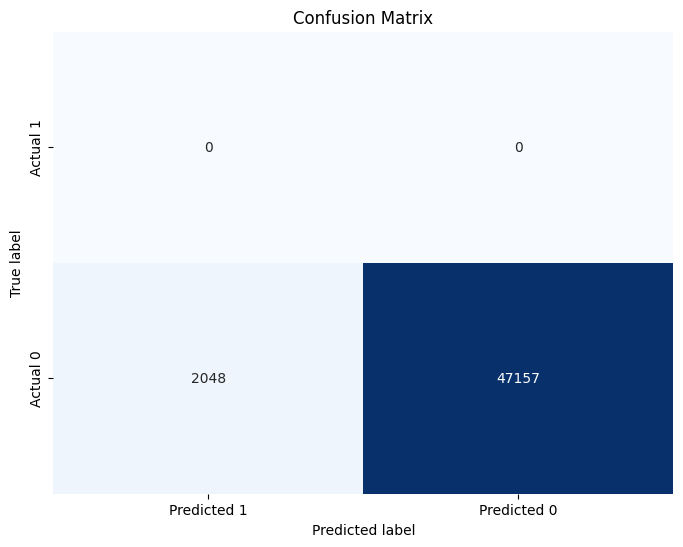

Log Loss: 0.14553757071761037
Accuracy: 0.9583782135961793


c:\Users\14smi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\14smi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     47157
           1       0.00      0.00      0.00      2048

    accuracy                           0.96     49205
   macro avg       0.48      0.50      0.49     49205
weighted avg       0.92      0.96      0.94     49205



c:\Users\14smi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [61]:


confusion_mat = confusion_matrix(y_test, y_pred)

# Rearrange the confusion matrix
confusion_mat = [[confusion_mat[1, 1], confusion_mat[0, 1]],
                 [confusion_mat[1, 0], confusion_mat[0, 0]]]

# Displaying the confusion matrix with seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=['Predicted 1', 'Predicted 0'],
            yticklabels=['Actual 1', 'Actual 0'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# Display other metrics
print("Log Loss:", logloss)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

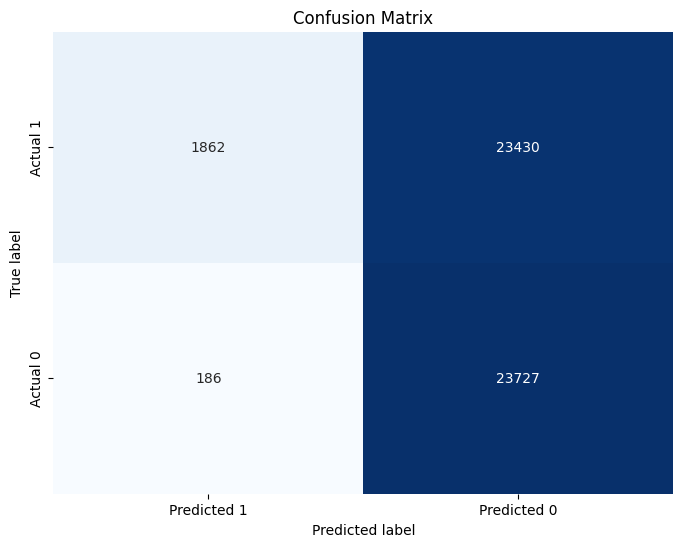

Log Loss: 0.5397370189221907
Accuracy: 0.9583782135961793
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.50      0.67     47157
           1       0.07      0.91      0.14      2048

    accuracy                           0.52     49205
   macro avg       0.53      0.71      0.40     49205
weighted avg       0.95      0.52      0.65     49205



In [62]:
model = LogisticRegression(penalty='l2', solver='liblinear',class_weight='balanced',max_iter=1000)
model.fit(X_train,y_train)

y_pred_proba=model.predict_proba(X_test) #we will get two columns. The first is the probability of not having the risk of a heart disease, the second of having it. 
threshold=0.9 #since heart diseases are relatively rare we want to get a higher recall value. This comes at the expense of precision, though. 
y_pred = (y_pred_proba[:,1]>0.3).astype(int)
# Calculate log loss (binary cross-entropy)
logloss = log_loss(y_test, y_pred_proba)



confusion_mat = confusion_matrix(y_test, y_pred)

# Rearrange the confusion matrix
confusion_mat = [[confusion_mat[1, 1], confusion_mat[0, 1]],
                 [confusion_mat[1, 0], confusion_mat[0, 0]]]

# Displaying the confusion matrix with seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=['Predicted 1', 'Predicted 0'],
            yticklabels=['Actual 1', 'Actual 0'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# Display other metrics
print("Log Loss:", logloss)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

c:\Users\14smi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\14smi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\14smi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

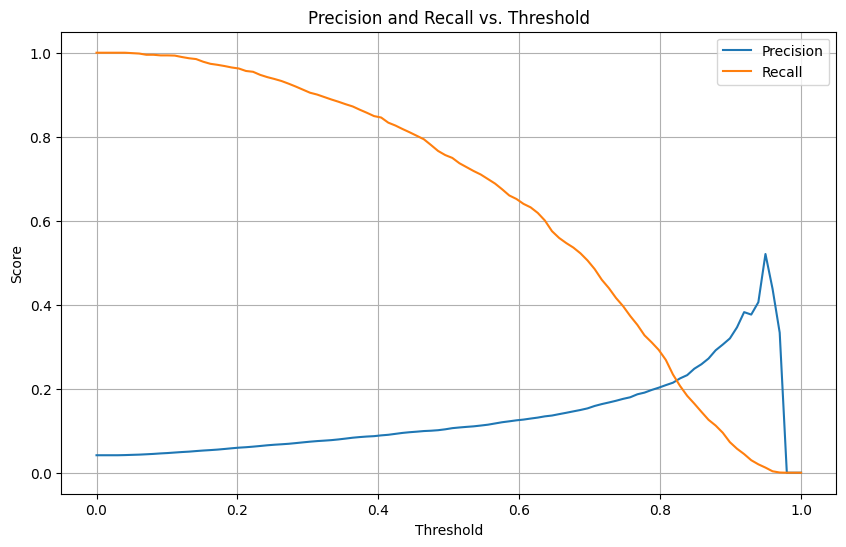

In [63]:
# Thresholds to test
thresholds = np.linspace(0, 1, 100)  # Generate 100 thresholds from 0 to 1

# Lists to store precision and recall
precisions = []
recalls = []    

# Calculate precision and recall for each threshold
for threshold in thresholds:
    y_pred = (y_pred_proba[:,1] > threshold).astype(int)
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))

# Plot precision and recall curves
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.title('Precision and Recall vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

In [64]:
# Get the coefficients and feature names
coefficients = model.coef_[0]
feature_names = X.columns

# Create a DataFrame to hold the coefficients
coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort the coefficients by absolute value to see the most influential features
coefficients_df['Abs_Coefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)

# Display the top 10 most influential features
print(coefficients_df.head(20))

                  Feature  Coefficient  Abs_Coefficient
16            AgeCategory    -1.005264         1.005264
0                     Sex     0.321969         0.321969
18        AlcoholDrinkers     0.287801         0.287801
15           SmokerStatus     0.226301         0.226301
11  HadDepressiveDisorder     0.225565         0.225565
3        MentalHealthDays     0.185387         0.185387
5              SleepHours    -0.046932         0.046932
10                HadCOPD     0.042811         0.042811
1           GeneralHealth    -0.042734         0.042734
17                    BMI    -0.039783         0.039783
8               HadStroke     0.030025         0.030025
12       HadKidneyDisease     0.027661         0.027661
13           HadArthritis     0.024331         0.024331
9               HadAsthma     0.021340         0.021340
4      PhysicalActivities     0.015849         0.015849
6          HadHeartAttack     0.009540         0.009540
7               HadAngina    -0.008713         0

                  Feature  Coefficient  Abs_Coefficient
16            AgeCategory    -1.005264         1.005264
0                     Sex     0.321969         0.321969
18        AlcoholDrinkers     0.287801         0.287801
15           SmokerStatus     0.226301         0.226301
11  HadDepressiveDisorder     0.225565         0.225565
3        MentalHealthDays     0.185387         0.185387
5              SleepHours    -0.046932         0.046932
10                HadCOPD     0.042811         0.042811
1           GeneralHealth    -0.042734         0.042734
17                    BMI    -0.039783         0.039783
8               HadStroke     0.030025         0.030025
12       HadKidneyDisease     0.027661         0.027661
13           HadArthritis     0.024331         0.024331
9               HadAsthma     0.021340         0.021340
4      PhysicalActivities     0.015849         0.015849
6          HadHeartAttack     0.009540         0.009540
7               HadAngina    -0.008713         0

c:\Users\14smi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\14smi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\14smi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

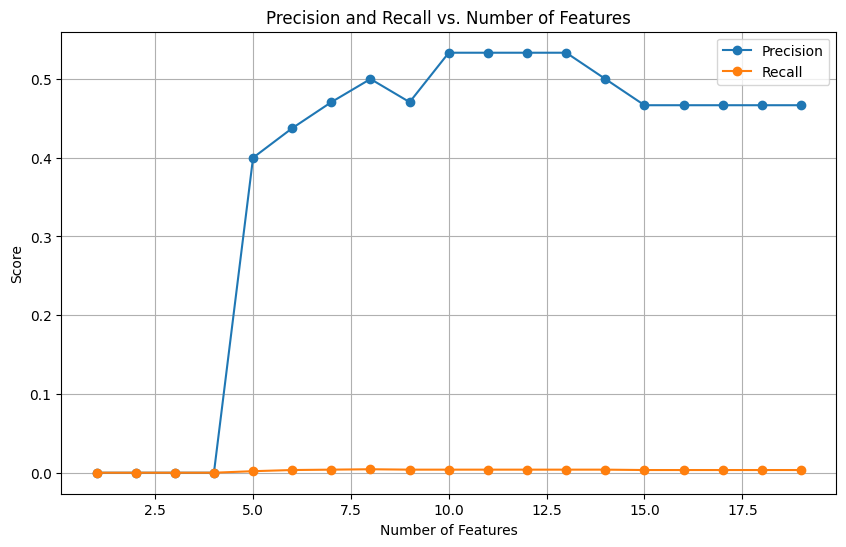

[0.0, 0.0, 0.0, 0.0, 0.4, 0.4375, 0.47058823529411764, 0.5, 0.47058823529411764, 0.5333333333333333, 0.5333333333333333, 0.5333333333333333, 0.5333333333333333, 0.5, 0.4666666666666667, 0.4666666666666667, 0.4666666666666667, 0.4666666666666667, 0.4666666666666667]


In [65]:
coefficients = model.coef_[0]
feature_names = X.columns

# Create a DataFrame to hold the coefficients
coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort the coefficients by absolute value to see the most influential features
coefficients_df['Abs_Coefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)
print(coefficients_df)

# Iterate over the number of top features and store precision and recall
precisions = []
recalls = []
num_features_list = range(1, len(feature_names) + 1)

for num_features in num_features_list:
    top_features = coefficients_df['Feature'].head(num_features).values
    
    # Subset the data to include only the top N features
    X_top = df[top_features]
    X_top_scaled = scaler.fit_transform(X_top)
    
    # Train-test split with the top N features
    X_train_top, X_test_top, y_train, y_test = train_test_split(X_top_scaled, y, test_size=0.2, random_state=42)
    
    # Train the new logistic regression model with top N features
    model_top = LogisticRegression(penalty='l2')

    model_top.fit(X_train_top, y_train)
    
    # Predict and evaluate the model
    y_pred_proba_top = model_top.predict_proba(X_test_top)
    threshold = 0.5
    y_pred_top = (y_pred_proba_top[:, 1] > threshold).astype(int)
    
    # Calculate precision and recall
    precision_top = precision_score(y_test, y_pred_top)
    recall_top = recall_score(y_test, y_pred_top)
    
    precisions.append(precision_top)
    recalls.append(recall_top)

# Plot precision and recall as a function of the number of features
plt.figure(figsize=(10, 6))
plt.plot(num_features_list, precisions, label='Precision', marker='o')
plt.plot(num_features_list, recalls, label='Recall', marker='o')
plt.title('Precision and Recall vs. Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

print(precisions)

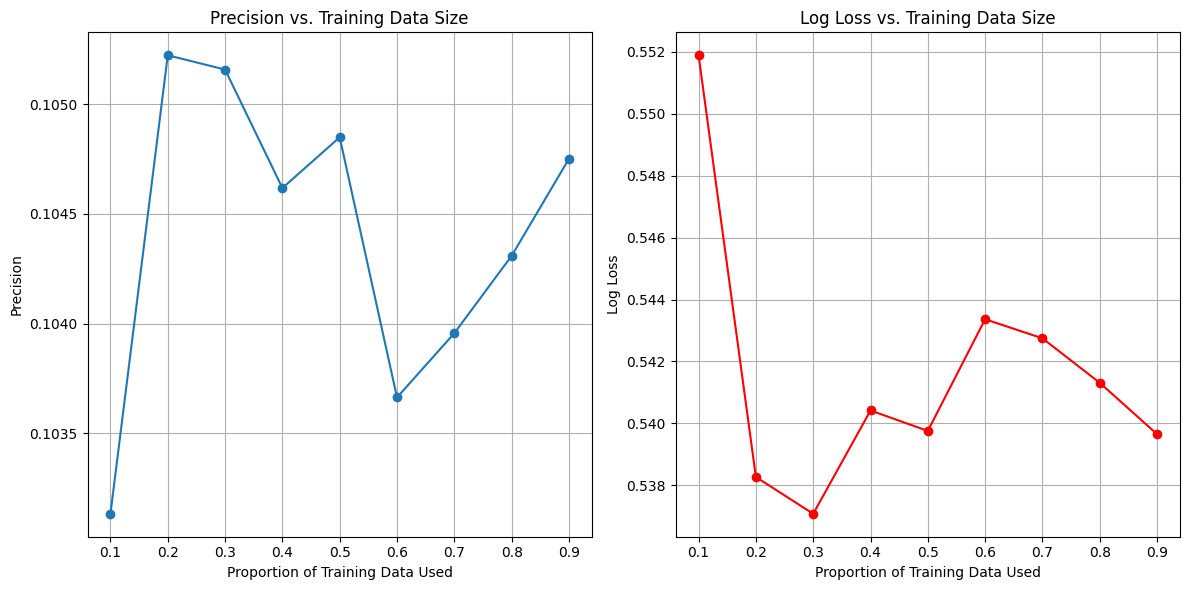

In [66]:
# Split into training and test data
X_train_full, X_test, y_train_full, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize lists to hold results
training_sizes = np.linspace(0.1, 0.9, 9)  # Changed to range from 0.1 to 0.9
precisions = []
log_losses = []

# Loop over different training sizes
for train_size in training_sizes:
    X_train, _, y_train, _ = train_test_split(X_train_full, y_train_full, train_size=train_size, random_state=42)
    
    # Train the logistic regression model
    model = LogisticRegression(penalty='l2', solver='liblinear',class_weight='balanced',max_iter=1000)

    model.fit(X_train, y_train)
    
    # Predict and calculate precision
    y_pred_proba = model.predict_proba(X_test)
    threshold = 0.5
    y_pred = (y_pred_proba[:, 1] > threshold).astype(int)
    
    precision = precision_score(y_test, y_pred)
    precisions.append(precision)
    
    # Calculate log loss (binary cross-entropy)
    logloss = log_loss(y_test, y_pred_proba)
    log_losses.append(logloss)

# Plot precision as a function of training data size
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(training_sizes, precisions, marker='o')
plt.title('Precision vs. Training Data Size')
plt.xlabel('Proportion of Training Data Used')
plt.ylabel('Precision')
plt.grid(True)

# Plot log loss as a function of training data size
plt.subplot(1, 2, 2)
plt.plot(training_sizes, log_losses, marker='o', color='r')
plt.title('Log Loss vs. Training Data Size')
plt.xlabel('Proportion of Training Data Used')
plt.ylabel('Log Loss')
plt.grid(True)

plt.tight_layout()
plt.show()

Top features: ['AgeCategory' 'Sex' 'AlcoholDrinkers' 'SmokerStatus'
 'HadDepressiveDisorder']
Log Loss with top features: 0.5442817429004843
Accuracy with top features: 0.9583375673203943
Confusion Matrix with top features:
 [[47144    13]
 [ 2037    11]]
Classification Report with top features:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     47157
           1       0.46      0.01      0.01      2048

    accuracy                           0.96     49205
   macro avg       0.71      0.50      0.49     49205
weighted avg       0.94      0.96      0.94     49205



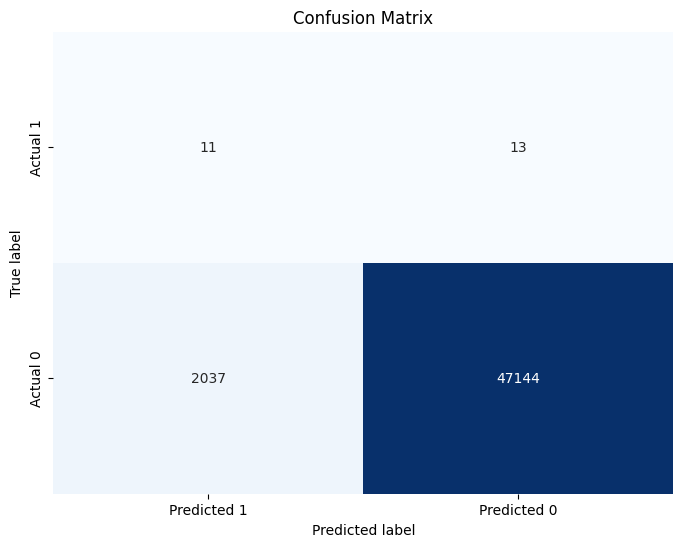

Log Loss: 0.5396516002447771
Accuracy: 0.9583782135961793
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     47157
           1       0.46      0.01      0.01      2048

    accuracy                           0.96     49205
   macro avg       0.71      0.50      0.49     49205
weighted avg       0.94      0.96      0.94     49205



In [67]:
TOP = 5  # Set the number of top features you want to use
top_features = coefficients_df['Feature'].head(TOP).values
print("Top features:", top_features)

# Subset the data to include only the top X features
X_top = df[top_features]
X_top_scaled = scaler.fit_transform(X_top)

# Train-test split with the top X features
X_train_top, X_test_top, y_train, y_test = train_test_split(X_top_scaled, y, test_size=0.2, random_state=42)

# Train the new logistic regression model with top X features
model_top = LogisticRegression(penalty='l2', solver='liblinear',class_weight='balanced',max_iter=1000)

model_top.fit(X_train_top, y_train)

# Evaluate the new model
y_pred_proba_top = model_top.predict_proba(X_test_top)
threshold = 0.95
y_pred_top = (y_pred_proba_top[:, 1] > threshold).astype(int)

logloss_top = log_loss(y_test, y_pred_proba_top)
accuracy_top = accuracy_score(y_test, y_pred_top)
confusion_mat_top = confusion_matrix(y_test, y_pred_top)
classification_rep_top = classification_report(y_test, y_pred_top)

print("Log Loss with top features:", logloss_top)
print("Accuracy with top features:", accuracy_top)
print("Confusion Matrix with top features:\n", confusion_mat_top)
print("Classification Report with top features:\n", classification_rep_top)



confusion_mat_top = confusion_matrix(y_test, y_pred_top)

# Rearrange the confusion matrix
confusion_mat_top = [[confusion_mat_top[1, 1], confusion_mat_top[0, 1]],
                 [confusion_mat_top[1, 0], confusion_mat_top[0, 0]]]

# Displaying the confusion matrix with seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_top, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=['Predicted 1', 'Predicted 0'],
            yticklabels=['Actual 1', 'Actual 0'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# Display other metrics
print("Log Loss:", logloss)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred_top))

In [68]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [69]:
#Input variables and targets
scaler=StandardScaler()
X=df.drop(columns=["HighRiskLastYear"])
X_scaled=scaler.fit_transform(X)
y=df["HighRiskLastYear"]
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the distribution of the classes in the resampled training set
print("After SMOTE")
print("HighRiskLastYear=0: ", sum(y_train_smote == 0))
print("HighRiskLastYear=1: ", sum(y_train_smote == 1))

# Check the distribution of the classes in the original training set
print("Original training set")
print("HighRiskLastYear=0: ", sum(y_train == 0))
print("HighRiskLastYear=1: ", sum(y_train == 1))



After SMOTE
HighRiskLastYear=0:  188289
HighRiskLastYear=1:  188289
Original training set
HighRiskLastYear=0:  188289
HighRiskLastYear=1:  8528


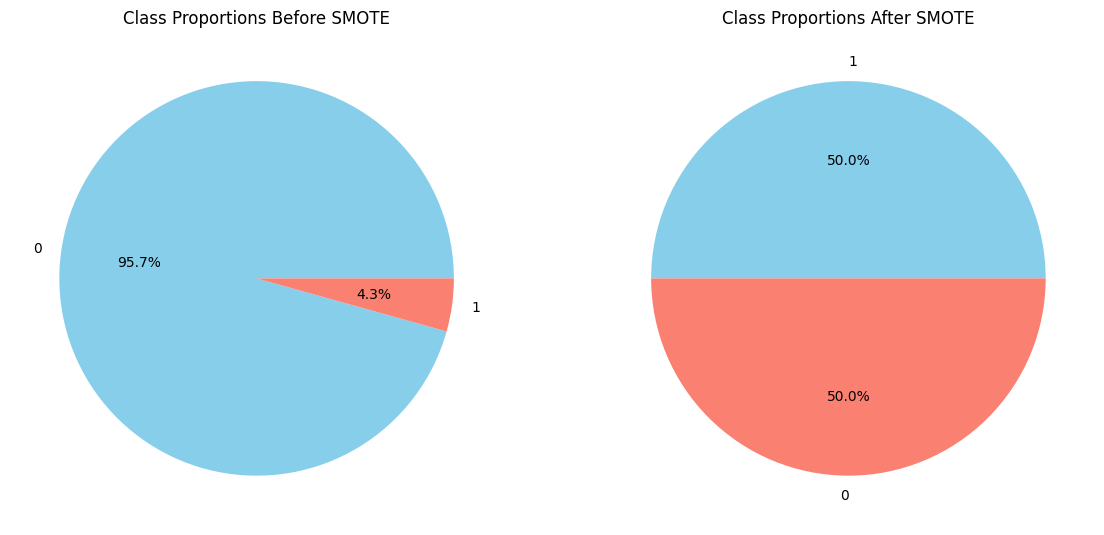

In [70]:
class_counts_before = y_train.value_counts(normalize=True)
class_counts_after = y_train_smote.value_counts(normalize=True)
#Plotting the proportions before and after SMOTE using pie charts
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Before SMOTE
ax[0].pie(class_counts_before, labels=class_counts_before.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
ax[0].set_title('Class Proportions Before SMOTE')

# After SMOTE
ax[1].pie(class_counts_after, labels=class_counts_after.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
ax[1].set_title('Class Proportions After SMOTE')

plt.show()


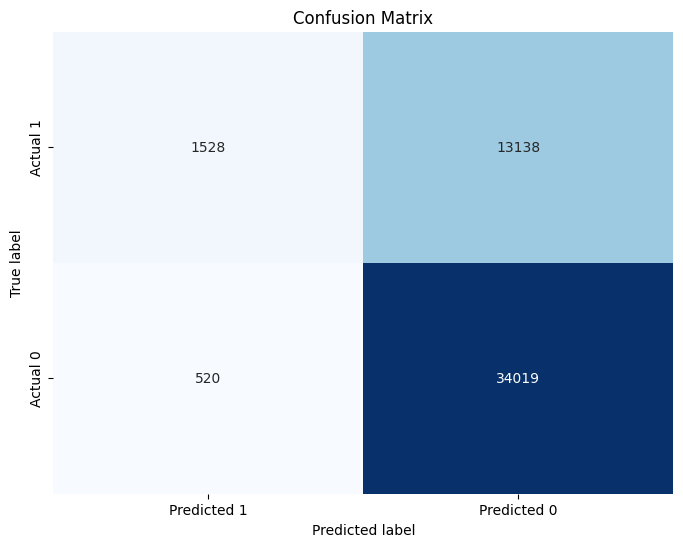

Log Loss: 0.5363996565694323
Accuracy: 0.9583782135961793
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.72      0.83     47157
           1       0.10      0.75      0.18      2048

    accuracy                           0.72     49205
   macro avg       0.54      0.73      0.51     49205
weighted avg       0.95      0.72      0.81     49205



In [71]:
model = LogisticRegression(penalty="l2")
model.fit(X_train_smote,y_train_smote)

y_pred_proba=model.predict_proba(X_test) #we will get two columns. The first is the probability of not having the risk of a heart disease, the second of having it. 
threshold=0.5 #since heart diseases are relatively rare we want to get a higher recall value. This comes at the expense of precision, though. 
y_pred = (y_pred_proba[:,1]>threshold).astype(int)
# Calculate log loss (binary cross-entropy)
logloss = log_loss(y_test, y_pred_proba)



confusion_mat = confusion_matrix(y_test, y_pred)

# Rearrange the confusion matrix
confusion_mat = [[confusion_mat[1, 1], confusion_mat[0, 1]],
                 [confusion_mat[1, 0], confusion_mat[0, 0]]]

# Displaying the confusion matrix with seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=['Predicted 1', 'Predicted 0'],
            yticklabels=['Actual 1', 'Actual 0'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# Display other metrics
print("Log Loss:", logloss)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

c:\Users\14smi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\14smi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\14smi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

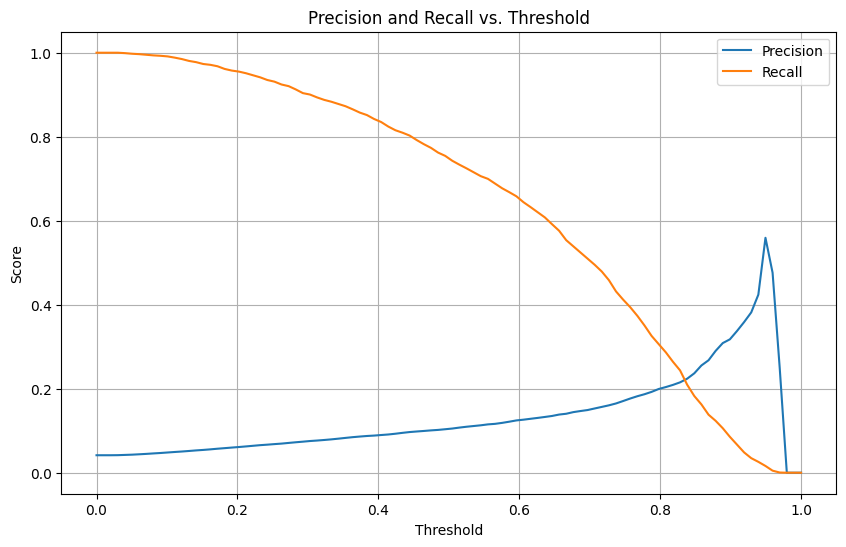

In [72]:
thresholds = np.linspace(0, 1, 100)  # Generate 100 thresholds from 0 to 1

# Lists to store precision and recall
precisions = []
recalls = []    

# Calculate precision and recall for each threshold
for threshold in thresholds:
    y_pred = (y_pred_proba[:,1] > threshold).astype(int)
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))

# Plot precision and recall curves
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.title('Precision and Recall vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

                  Feature  Coefficient  Abs_Coefficient
16            AgeCategory    -1.096037         1.096037
0                     Sex     0.331325         0.331325
18        AlcoholDrinkers     0.306544         0.306544
11  HadDepressiveDisorder     0.237343         0.237343
15           SmokerStatus     0.224038         0.224038
3        MentalHealthDays     0.149479         0.149479
10                HadCOPD     0.061347         0.061347
1           GeneralHealth    -0.061246         0.061246
5              SleepHours    -0.058283         0.058283
13           HadArthritis     0.058241         0.058241
17                    BMI    -0.055526         0.055526
2      PhysicalHealthDays    -0.044987         0.044987
8               HadStroke     0.043975         0.043975
12       HadKidneyDisease     0.040666         0.040666
4      PhysicalActivities     0.029050         0.029050
6          HadHeartAttack     0.024190         0.024190
14            HadDiabetes    -0.009471         0

c:\Users\14smi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\14smi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\14smi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

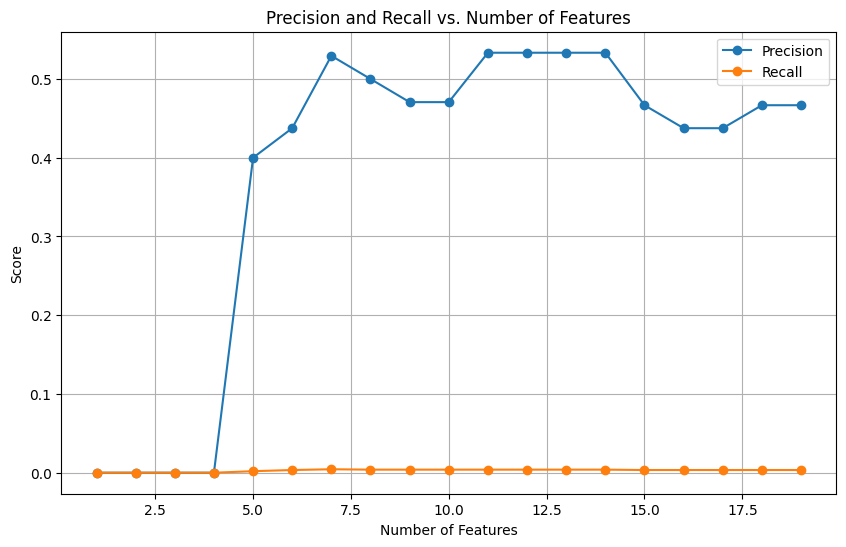

[0.0, 0.0, 0.0, 0.0, 0.4, 0.4375, 0.5294117647058824, 0.5, 0.47058823529411764, 0.47058823529411764, 0.5333333333333333, 0.5333333333333333, 0.5333333333333333, 0.5333333333333333, 0.4666666666666667, 0.4375, 0.4375, 0.4666666666666667, 0.4666666666666667]


In [73]:
coefficients = model.coef_[0]
feature_names = X.columns

# Create a DataFrame to hold the coefficients
coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort the coefficients by absolute value to see the most influential features
coefficients_df['Abs_Coefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)
print(coefficients_df)

# Iterate over the number of top features and store precision and recall
precisions = []
recalls = []
num_features_list = range(1, len(feature_names) + 1)

for num_features in num_features_list:
    top_features = coefficients_df['Feature'].head(num_features).values
    
    # Subset the data to include only the top N features
    X_top = df[top_features]
    X_top_scaled = scaler.fit_transform(X_top)
    
    # Train-test split with the top N features
    X_train_top, X_test_top, y_train, y_test = train_test_split(X_top_scaled, y, test_size=0.2, random_state=42)
    
    # Train the new logistic regression model with top N features
    model_top = LogisticRegression(penalty='l2')

    model_top.fit(X_train_top, y_train)
    
    # Predict and evaluate the model
    y_pred_proba_top = model_top.predict_proba(X_test_top)
    threshold = 0.5
    y_pred_top = (y_pred_proba_top[:, 1] > threshold).astype(int)
    
    # Calculate precision and recall
    precision_top = precision_score(y_test, y_pred_top)
    recall_top = recall_score(y_test, y_pred_top)
    
    precisions.append(precision_top)
    recalls.append(recall_top)

# Plot precision and recall as a function of the number of features
plt.figure(figsize=(10, 6))
plt.plot(num_features_list, precisions, label='Precision', marker='o')
plt.plot(num_features_list, recalls, label='Recall', marker='o')
plt.title('Precision and Recall vs. Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

print(precisions)

In [74]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df['HighRiskLastYear'] == 0]
df_minority = df[df['HighRiskLastYear'] == 1]

# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                   replace=False,     # sample without replacement
                                   n_samples=len(df_minority),    # to match minority class
                                   random_state=42)   # reproducible results

# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# Display new class counts
print(df_downsampled['HighRiskLastYear'].value_counts())

# Separate features and target variable
X = df_downsampled.drop('HighRiskLastYear', axis=1)
y = df_downsampled['HighRiskLastYear']

#Input variables and targets
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


HighRiskLastYear
0    10576
1    10576
Name: count, dtype: int64


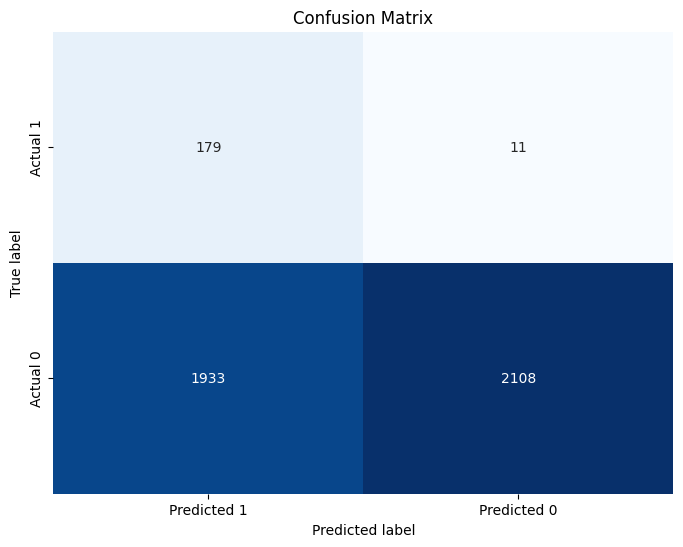

Log Loss: 0.5296999159550507
Accuracy: 0.9583782135961793
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.99      0.68      2119
           1       0.94      0.08      0.16      2112

    accuracy                           0.54      4231
   macro avg       0.73      0.54      0.42      4231
weighted avg       0.73      0.54      0.42      4231



In [75]:
model = LogisticRegression()
model.fit(X_train,y_train)

y_pred_proba=model.predict_proba(X_test) #we will get two columns. The first is the probability of not having the risk of a heart disease, the second of having it. 
threshold=0.9 #since heart diseases are relatively rare we want to get a higher recall value. This comes at the expense of precision, though. 
y_pred = (y_pred_proba[:,1]>threshold).astype(int)
# Calculate log loss (binary cross-entropy)
logloss = log_loss(y_test, y_pred_proba)



confusion_mat = confusion_matrix(y_test, y_pred)

# Rearrange the confusion matrix
confusion_mat = [[confusion_mat[1, 1], confusion_mat[0, 1]],
                 [confusion_mat[1, 0], confusion_mat[0, 0]]]

# Displaying the confusion matrix with seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=['Predicted 1', 'Predicted 0'],
            yticklabels=['Actual 1', 'Actual 0'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# Display other metrics
print("Log Loss:", logloss)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

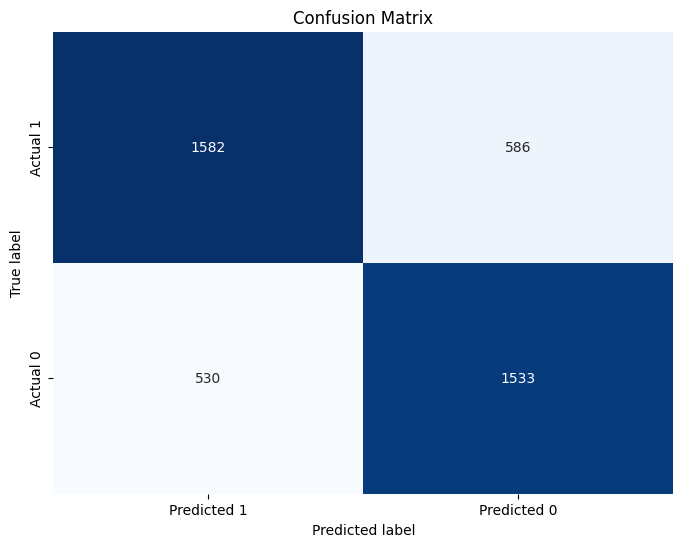

Log Loss: 0.5296999159550507
Accuracy: 0.9583782135961793
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.72      0.73      2119
           1       0.73      0.75      0.74      2112

    accuracy                           0.74      4231
   macro avg       0.74      0.74      0.74      4231
weighted avg       0.74      0.74      0.74      4231



In [76]:
model = LogisticRegression()

model.fit(X_train,y_train)

y_pred_proba=model.predict_proba(X_test) #we will get two columns. The first is the probability of not having the risk of a heart disease, the second of having it. 
threshold=0.5 #since heart diseases are relatively rare we want to get a higher recall value. This comes at the expense of precision, though. 
y_pred = (y_pred_proba[:,1]>threshold).astype(int)
# Calculate log loss (binary cross-entropy)
logloss = log_loss(y_test, y_pred_proba)



confusion_mat = confusion_matrix(y_test, y_pred)

# Rearrange the confusion matrix
confusion_mat = [[confusion_mat[1, 1], confusion_mat[0, 1]],
                 [confusion_mat[1, 0], confusion_mat[0, 0]]]

# Displaying the confusion matrix with seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=['Predicted 1', 'Predicted 0'],
            yticklabels=['Actual 1', 'Actual 0'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# Display other metrics
print("Log Loss:", logloss)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

c:\Users\14smi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\14smi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


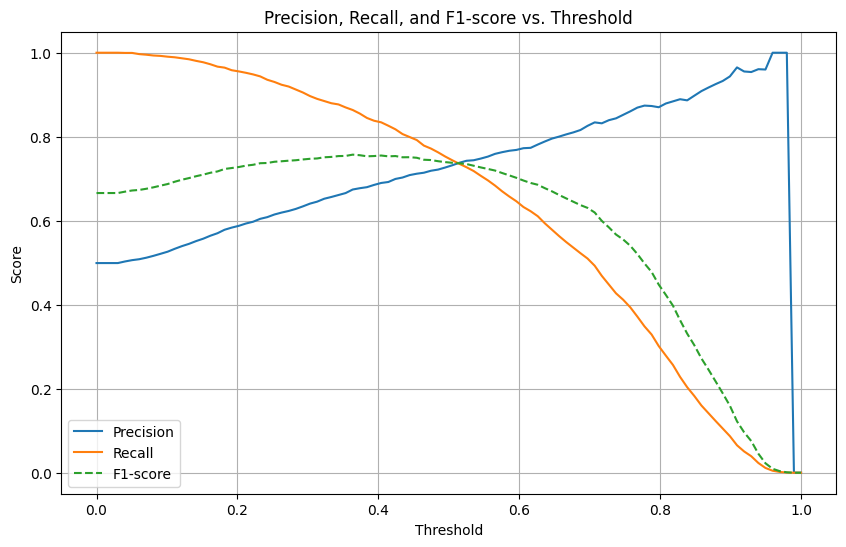

In [77]:
# Example precision and recall values
thresholds = np.linspace(0, 1, 100)  # Generate 100 thresholds from 0 to 1

# Lists to store precision, recall, and F1-score
precisions = []
recalls = []    
f1_scores = []

# Calculate precision, recall, and F1-score for each threshold
for threshold in thresholds:
    y_pred = (y_pred_proba[:,1] > threshold).astype(int)
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

# Plot precision, recall, and F1-score curves
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.plot(thresholds, f1_scores, label='F1-score', linestyle='--')
plt.title('Precision, Recall, and F1-score vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()


In [78]:
print("precisions",precisions)
print("recalls",recalls)
print("f1_scores",f1_scores)
print("max_f1:",max(f1_scores))

precisions [0.499172772394233, 0.499172772394233, 0.499172772394233, 0.499172772394233, 0.5029783178460805, 0.506113641812515, 0.5083313209369718, 0.5119337554797857, 0.516367216342604, 0.5212633673215618, 0.5262893081761006, 0.5331801939765186, 0.539477090344292, 0.544954128440367, 0.5515312916111851, 0.5572354211663066, 0.5642857142857143, 0.5702317788327282, 0.5785288270377733, 0.5836216839677048, 0.5878240605884066, 0.5933903806432576, 0.5975536992840096, 0.6044889293296937, 0.6085617493070526, 0.6148310387984981, 0.6193650793650793, 0.6232349165596919, 0.628096479791395, 0.6341625207296849, 0.6407307171853857, 0.6453827669069687, 0.6523560209424084, 0.6565371024734983, 0.6611924312745449, 0.6658209496194273, 0.6743068391866913, 0.6774193548387096, 0.6798780487804879, 0.6852497096399536, 0.6898981989036805, 0.6921856406188021, 0.6994734710409073, 0.7028477094510936, 0.7086481947942905, 0.7119148936170213, 0.7142857142857143, 0.7190119100132334, 0.7217741935483871, 0.726691042047532

In [79]:
optimal_threshold=0.36


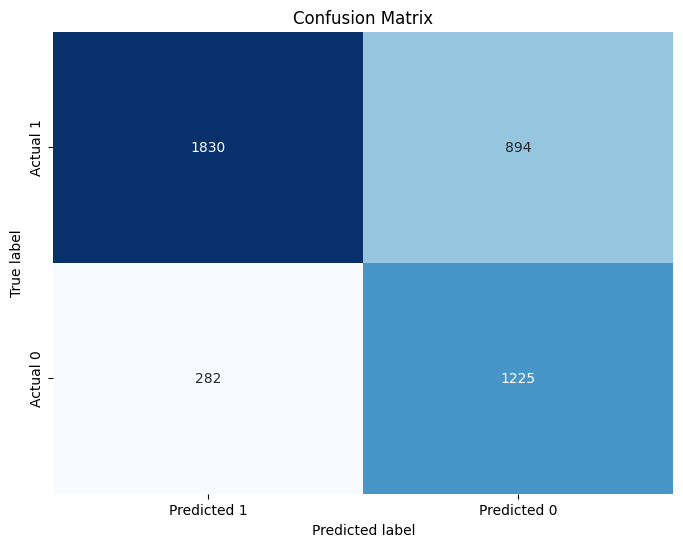

Log Loss: 0.5296999159550507
Accuracy: 0.9583782135961793
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.58      0.68      2119
           1       0.67      0.87      0.76      2112

    accuracy                           0.72      4231
   macro avg       0.74      0.72      0.72      4231
weighted avg       0.74      0.72      0.72      4231



In [80]:
model = LogisticRegression(penalty="l2")
model.fit(X_train,y_train)

y_pred_proba=model.predict_proba(X_test) #we will get two columns. The first is the probability of not having the risk of a heart disease, the second of having it. 
threshold=0.36 #since heart diseases are relatively rare we want to get a higher recall value. This comes at the expense of precision, though. 
y_pred = (y_pred_proba[:,1]>threshold).astype(int)
# Calculate log loss (binary cross-entropy)
logloss = log_loss(y_test, y_pred_proba)



confusion_mat = confusion_matrix(y_test, y_pred)

# Rearrange the confusion matrix
confusion_mat = [[confusion_mat[1, 1], confusion_mat[0, 1]],
                 [confusion_mat[1, 0], confusion_mat[0, 0]]]

# Displaying the confusion matrix with seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=['Predicted 1', 'Predicted 0'],
            yticklabels=['Actual 1', 'Actual 0'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# Display other metrics
print("Log Loss:", logloss)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))